In [1]:
import pandas as pd
df = pd.read_csv('c:/data/convenience/temp/df_dis2,3.csv', encoding='ANSI', index_col=0)
df.columns

Index(['비아파트가구수', '아파트평균시가', '약국수', '극장수', '의료기관', '교육기관', '대중교통', '월매출평균',
       'survive'],
      dtype='object')

In [2]:
X=df.iloc[:,:-1]
y=df['survive']

In [3]:
scores=[]

In [4]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import GridSearchCV 

pipe=Pipeline([
    ('scaler',MinMaxScaler()),
    ('clf',LinearRegression())
])

params={
    "clf__fit_intercept": [True, False],
    "clf__normalize": [True, False]             
}

# cv 교차검증횟수, n_jobs 사용 코어 수
grid=GridSearchCV(pipe, params, cv=10, n_jobs=-1)
grid.fit(X,y)
print(grid.best_params_) # 최적의 파라미터
print(grid.best_score_)  # 최고점수
scores.append(grid.best_score_) 


{'clf__fit_intercept': True, 'clf__normalize': True}
0.060457028178559115


In [5]:
from sklearn.tree import DecisionTreeRegressor 
pipe=Pipeline([
    ('scaler',MinMaxScaler()),
    ('clf',DecisionTreeRegressor())
])
# max_depth 가지치기단계 설정
params={
    'clf__max_depth': list(range(3,10))
}
grid=GridSearchCV(pipe, params, cv=10, n_jobs=-1)
grid.fit(X,y)
print(grid.best_params_) # 최적의 파라미터
print(grid.best_score_)  # 최고점수
scores.append(grid.best_score_)

{'clf__max_depth': 3}
0.02371722114204472


In [6]:
grid.best_estimator_['clf']

DecisionTreeRegressor(max_depth=3)

In [7]:
tree=grid.best_estimator_['clf']

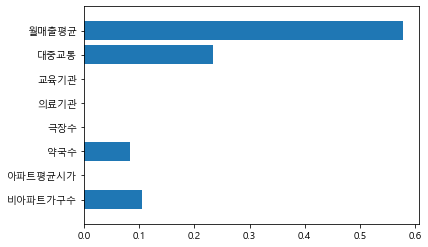

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

def plot_tree(model):
    n_features=X.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features), X.columns) 
    plt.ylim(-1, n_features)

#특성 중요도 그래프
plot_tree(tree)  

In [9]:
from sklearn.ensemble import RandomForestRegressor 
pipe=Pipeline([    
    ('clf',RandomForestRegressor())
])
params={
    'clf__max_depth': list(range(3,10)),
    'clf__n_estimators': list(range(10,110,10))
}
grid=GridSearchCV(pipe, params, cv=10, n_jobs=-1)
grid.fit(X,y)
print(grid.best_params_) # 최적의 파라미터
print(grid.best_score_)  # 최고점수
scores.append(grid.best_score_)


{'clf__max_depth': 4, 'clf__n_estimators': 50}
0.06720717076491813


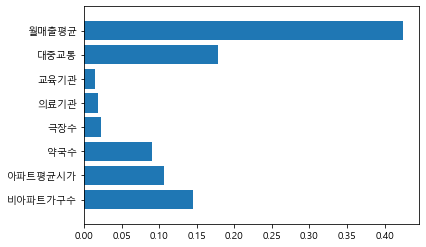

In [10]:
#파이프라인에서 clf 모형을 가져옴
rf=grid.best_estimator_['clf']
#랜덤포레스트의 특성 중요도 그래프
plot_tree(rf) 

In [11]:
from sklearn.neighbors import KNeighborsRegressor 
pipe=Pipeline([    
    ('scaler',MinMaxScaler()),
    ('clf',KNeighborsRegressor())
])
params={'clf__n_neighbors': list(range(1,15))}
grid=GridSearchCV(pipe, params, cv=10, n_jobs=-1)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)
scores.append(grid.best_score_)


{'clf__n_neighbors': 14}
0.046300718106289884


In [12]:
from sklearn.neural_network import MLPRegressor 
pipe=Pipeline([    
    ('scaler',MinMaxScaler()),
    ('clf',MLPRegressor())
])
# hidden_layer_sizes 은닉층의 수와 노드수 activation 활성화함수
params={
    'clf__hidden_layer_sizes':[(100,),(50,50),(100,100), (50, 100), (26, 52), (32, 32), (52, 208), (20, 40, 80)],
    'clf__activation': ['tanh','relu'],
    'clf__alpha': [0.0001, 0.001, 0.01, 0.1]
}
grid=GridSearchCV(pipe, params, cv=10, n_jobs=-1)
grid.fit(X,y)
print(grid.best_params_) # 최적의 파라미터
print(grid.best_score_) # 최고점수
scores.append(grid.best_score_)

{'clf__activation': 'relu', 'clf__alpha': 0.0001, 'clf__hidden_layer_sizes': (20, 40, 80)}
0.06214542342055831


In [13]:
from sklearn.svm import SVR 
pipe=Pipeline([    
    ('scaler', MinMaxScaler()),
    ('clf', SVR())
])

params={
    'clf__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'clf__gamma':[0.0001, 0.001, 0.01, 0.1],
}
grid=GridSearchCV(pipe, params, cv=10, n_jobs=-1)
grid.fit(X,y)
print(grid.best_params_) 
print(grid.best_score_) 
scores.append(grid.best_score_)

{'clf__C': 10, 'clf__gamma': 0.1}
0.033288249035439685


In [16]:
from sklearn.ensemble import GradientBoostingRegressor
pipe = Pipeline([
     ('scaler', MinMaxScaler()),
     ('clf', GradientBoostingRegressor()),
])
params={
    'clf__n_estimators': list(range(10,110,10)),
    'clf__max_depth': list(range(3,6)),
    'clf__alpha': [0.0001, 0.001, 0.01, 0.1]
}
grid = GridSearchCV(pipe, params, cv=10, n_jobs=-1)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)
scores.append(grid.best_score_)

{'clf__alpha': 0.01, 'clf__max_depth': 3, 'clf__n_estimators': 30}
0.05417332273065044


[0.06045703 0.02371722 0.06720717 0.04630072 0.06214542 0.03328825
 0.05417332]
최적의 알고리즘: RF
최고 정확도: 0.06720717076491813


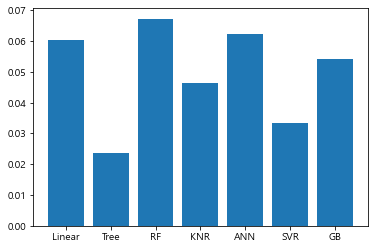

In [24]:
import matplotlib.pyplot as plt 

methods=['Linear','Tree','RF','KNR','ANN','SVR', 'GB']
scores_arr=np.array(scores) #리스트를 넘파이 배열로 변환
max_rate=np.max(scores_arr) #최대값
idx=np.argmax(scores_arr) #최대값의 인덱스

print(scores_arr)
print('최적의 알고리즘:',methods[idx])
print('최고 정확도:', max_rate)

plt.bar(methods, scores_arr) #막대그래프
plt.show()